# **Programming assignment for the Perceptron/Adaline models**

## Defining the Perceptron Class

In [238]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.accuracies_ = []  # Track accuracies over epochs
    
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            
            # Calculate accuracy after each epoch and store it
            predictions = self.predict(X)
            accuracy = accuracy_score(y, predictions)  #from sklearn 
            self.accuracies_.append(accuracy)
    
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]   #this returns an array
    
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)   #note to self, this returns an array

    def make_graph(self):

        display(HTML(f"<h2>How did the Perceptron training go:</h2>"))
        
        fig, ax = plt.subplots(ncols=2, figsize=(10, 4))  # ncols=2 means two columns
        
        # Plot misclassification errors over epochs
        ax[0].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
        ax[0].set_xlabel('Epochs')
        ax[0].set_ylabel('Number of updates')
        ax[0].set_title('Misclassification Errors during Training')
        
        # Plot the accuracy over epochs
        ax[1].plot(range(1, len(ppn.accuracies_) + 1), ppn.accuracies_, marker='o')
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_title('Accuracy After each Epochs during Training')
        
        plt.show()





# Defining the Adeline Class

In [239]:
class AdalineGD(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.accuracies_ = []  # List to store accuracy over epochs
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)

            predictions = self.predict(X)
            accuracy = np.mean(predictions == y)  # Accuracy calculation
            self.accuracies_.append(accuracy)
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

    def make_adaline_graph(self):

        display(HTML(f"<h2>How did the Adeline training go:</h2>"))
        fig, ax = plt.subplots(ncols=2, figsize=(10, 4))  # ncols=2 means two columns
        
        # Plot misclassification errors over epochs
        ax[0].plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='o')
        ax[0].set_xlabel('Epochs')
        ax[0].set_ylabel('Sum-squared-error')
        ax[0].set_title('Adaline - Learning rate 0.0001')
        
        # Plot accuracy over epochs
        ax[1].plot(range(1, len(adaline.accuracies_) + 1), adaline.accuracies_, marker='o')
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_title('Accuracy After each Epoch during Training')
        
        plt.show()

## Train and Test Models with two features: Petal length & Sepal length


I'm looking at Iris-setosa and Iris-versicolor. These two species are easy to separate since their feature values are distinct enough that a clear boundary can be drawn between them, making them linearly separable.

I am starting with sepal length and petal length since these features have sufficiently different ranges.

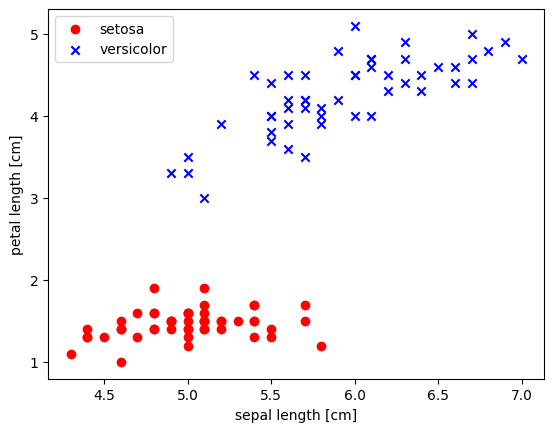

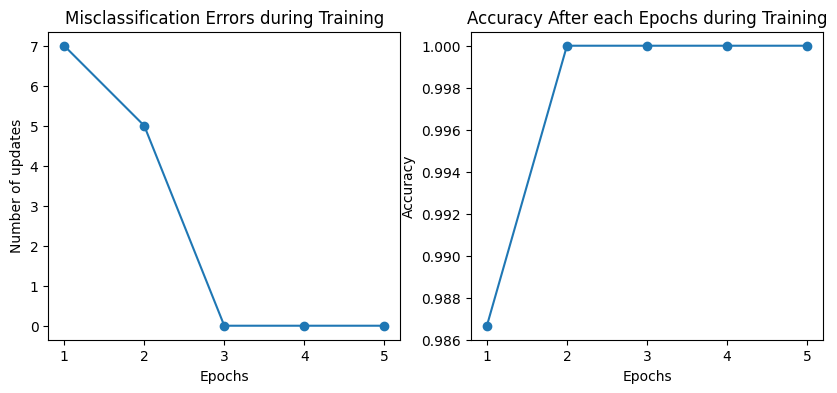

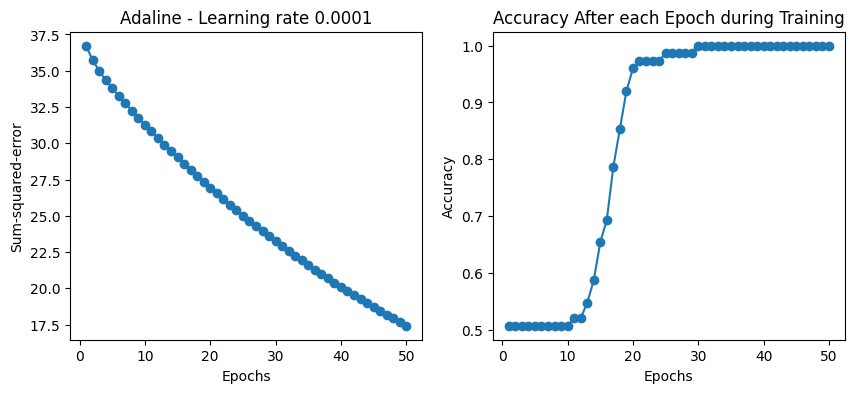

In [240]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import display, HTML

# Link to the database
s = os.path.join('http://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
df = pd.read_csv(s, header=None, encoding='utf-8')

# Select Setosa and Versicolor (binary classification)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract (0)sepal length, (1)sepal width, (2)petal length, (3)petal width
X = df.iloc[0:100, [0,2]].values


display(HTML(f"<h2>Simple illustration to show that the chosen Irises and their features are linearly seperable</h2>"))
# plot data
plt.scatter(X[:50, 0], X[:50, 1], 
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


# Split the data into 75% training and 25% testing, shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=None)

# Train the Perceptron on the training data
ppn = Perceptron(eta=0.1, n_iter=5)
ppn.fit(X_train, y_train)

ppn.make_graph()

# Test the model on the testing data
y_pred = ppn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
#print(f'Test accuracy: {test_accuracy:.2f}')
display(HTML(f"<h1>Perceptron accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))


#---------------------------------------------------------------------------------------


adaline = AdalineGD(eta=0.0001, n_iter=50)
adaline.fit(X_train, y_train)

adaline.make_adaline_graph()

y_pred = adaline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
display(HTML(f"<h1>Adaline accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))




## Running Models on Three Features:  -  Sepal length & width, and Petal length

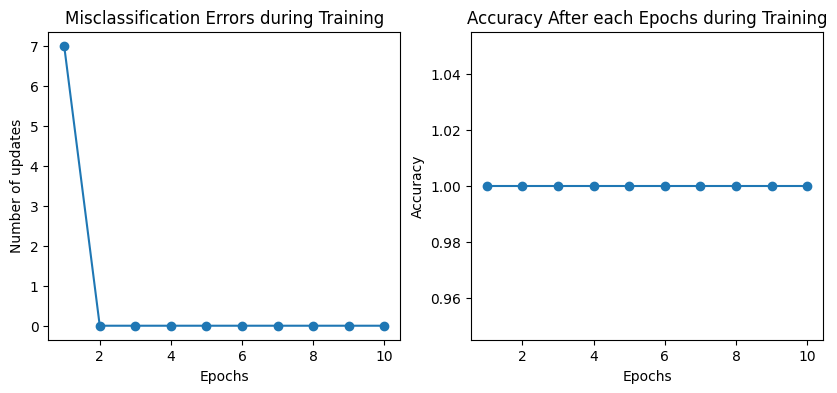

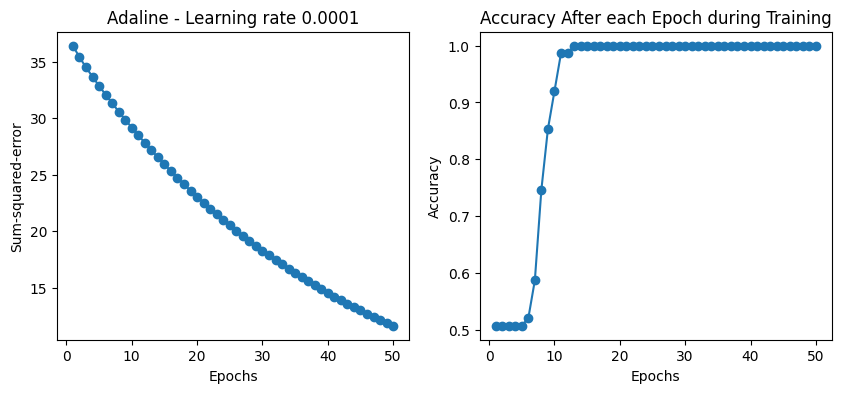

In [241]:
# Sample data
X = df.iloc[0:100, [0, 1, 2]].values  # sepal length, sepal width, and petal length

# Split the data into 75% training and 25% testing, shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=None)

# Train the Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)

ppn.make_graph()

# Test the model on the testing data
y_pred = ppn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
#print(f'Test accuracy: {test_accuracy:.2f}')
display(HTML(f"<h1>Perceptron accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))


#-------------------------------

adaline = AdalineGD(eta=0.0001, n_iter=50)
adaline.fit(X_train, y_train)

adaline.make_adaline_graph()

y_pred = adaline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
display(HTML(f"<h1>Adaline accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))





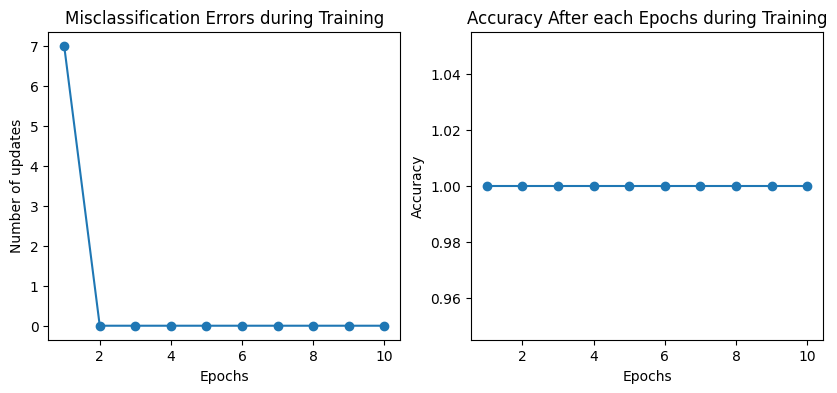

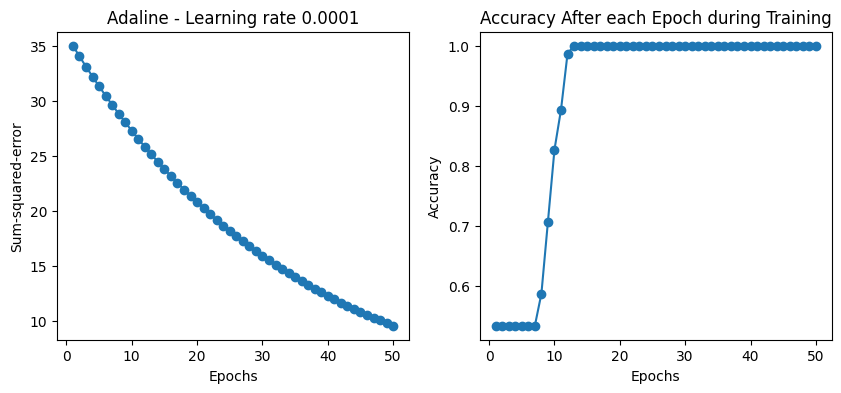

In [242]:
# Prepare data with all four features
X = df.iloc[0:100, [0, 1, 2, 3]].values

# Split the data into 75% training and 25% testing, shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=None)

# Train the Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)

ppn.make_graph()

# Test the model on the testing data
y_pred = ppn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
#print(f'Test accuracy: {test_accuracy:.2f}')
display(HTML(f"<h1>Perceptron accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))


#-------------------------------

adaline = AdalineGD(eta=0.0001, n_iter=50)
adaline.fit(X_train, y_train)

adaline.make_adaline_graph()

y_pred = adaline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
display(HTML(f"<h1>Adaline accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))


One thing I notice is that Adeline get accurate more quickly as you add features. I guess additional features provide more information to the model and this helps the classifier separate the data more effectively.

Another thing is that the learning rate needs to be a lot smaller for Adeline otherwise the SSE curve actually inverts and the model gets worse.

As mentionned previously, Iris-setosa is easy to separate from the other two species because its feature values are distinct. So for this next part of the exercise I chose Iris-versicolor and Iris-virginica because they have overlapping feature ranges, making it more challenging to distinguish between them.
I start with Sepal Width and Petal Width because these features share similar value ranges. When plotted, the data points of the two species overlap significantly, showing that they cannot be easily separated with these features alone.

# Using non-linearly separable data

## Train and Test Models with two features: Sepal Width and Petal Width 

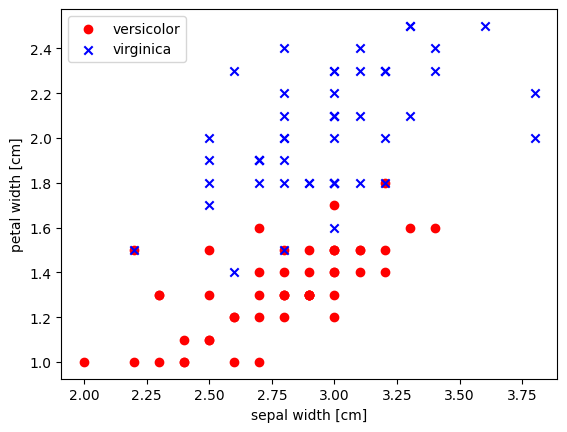

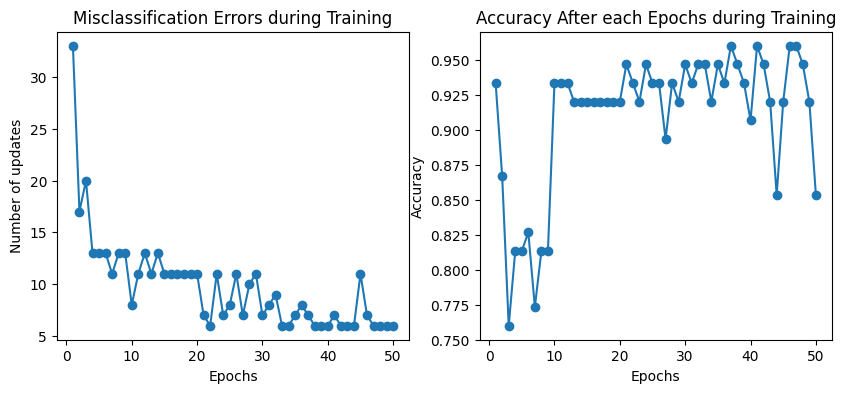

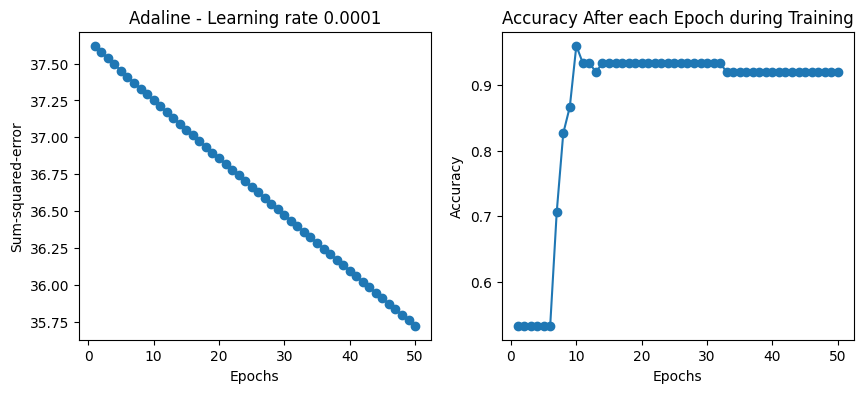

In [247]:
# Select Setosa and Versicolor (binary classification)
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# Extract (0)sepal length, (1)sepal width, (2)petal length, (3)petal width
X = df.iloc[50:150, [1,3]].values

display(HTML(f"<h2>Simple illustration to show that the chosen Irises and their features are NOT linearly seperable</h2>"))
# plot data
plt.scatter(X[:50, 0], X[:50, 1], 
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color='blue', marker='x', label='virginica')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

# Split the data into 75% training and 25% testing, shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1)

# Train the Perceptron on the training data
ppn = Perceptron(eta=0.1, n_iter=50)
ppn.fit(X_train, y_train)

ppn.make_graph()

# Test the model on the testing data
y_pred = ppn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
#print(f'Test accuracy: {test_accuracy:.2f}')
display(HTML(f"<h1>Perceptron accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))


#---------------------------------------------------------------------------------------


adaline = AdalineGD(eta=0.0001, n_iter=50)
adaline.fit(X_train, y_train)

adaline.make_adaline_graph()

y_pred = adaline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
display(HTML(f"<h1>Adaline accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))

## Now with three features: Sepal Width, Petal Width and Sepal Lenght

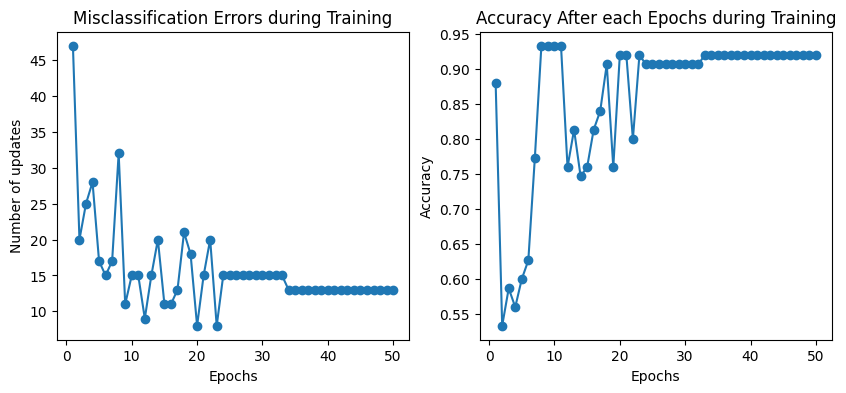

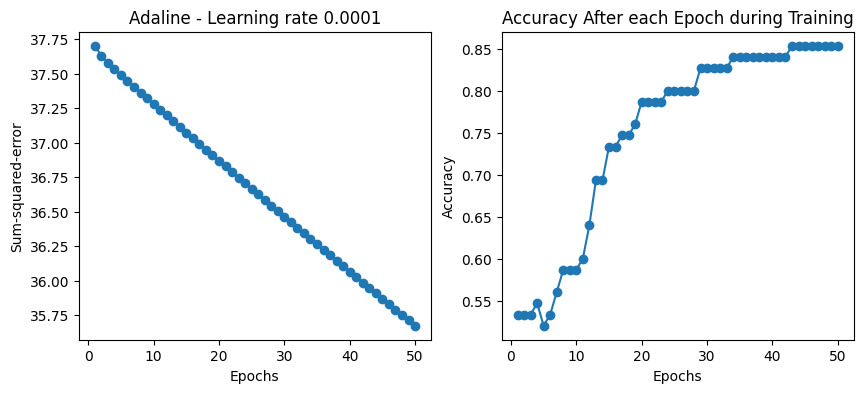

In [244]:

# Extract (0)sepal length, (1)sepal width, (2)petal length, (3)petal width
X = df.iloc[50:150, [0,1,3]].values

# Split the data into 75% training and 25% testing, shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1)

# Train the Perceptron on the training data
ppn = Perceptron(eta=0.1, n_iter=50)
ppn.fit(X_train, y_train)

ppn.make_graph()

# Test the model on the testing data
y_pred = ppn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
#print(f'Test accuracy: {test_accuracy:.2f}')
display(HTML(f"<h1>Perceptron accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))


#---------------------------------------------------------------------------------------


adaline = AdalineGD(eta=0.0001, n_iter=50)
adaline.fit(X_train, y_train)

adaline.make_adaline_graph()

y_pred = adaline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
display(HTML(f"<h1>Adaline accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))

## Now with ALL features

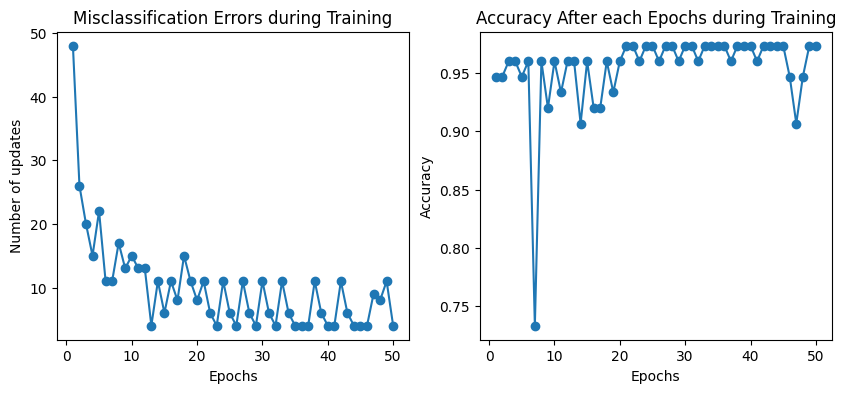

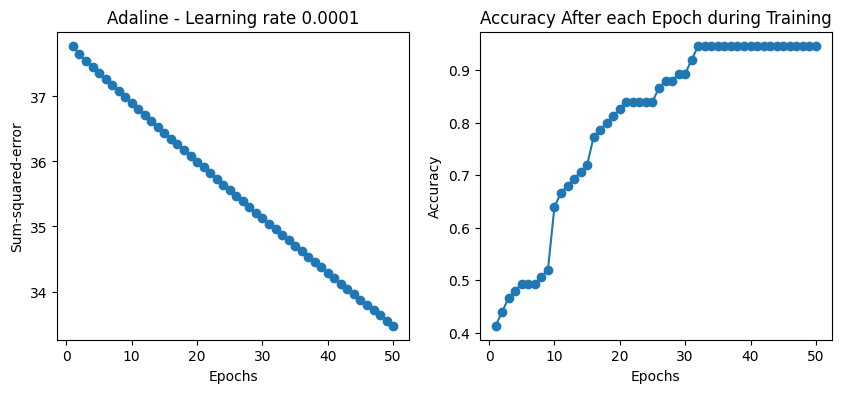

In [245]:
# Extract (0)sepal length, (1)sepal width, (2)petal length, (3)petal width
X = df.iloc[50:150, [0,1,2,3]].values

# Split the data into 75% training and 25% testing, shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1)

# Train the Perceptron on the training data
ppn = Perceptron(eta=0.1, n_iter=50)
ppn.fit(X_train, y_train)

# Create a figure with two subplots (side by side)
ppn.make_graph()

# Test the model on the testing data
y_pred = ppn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
#print(f'Test accuracy: {test_accuracy:.2f}')
display(HTML(f"<h1>Perceptron accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))


#---------------------------------------------------------------------------------------


adaline = AdalineGD(eta=0.0001, n_iter=50)
adaline.fit(X_train, y_train)

adaline.make_adaline_graph()

y_pred = adaline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
display(HTML(f"<h1>Adaline accuracy on Test set: {test_accuracy * 100:.2f}%</h1>"))